In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder ,  OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix , accuracy_score
import seaborn as sns 


In [2]:
df = pd.read_csv("shop_smart_ecommerce.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df1 = df 
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df1.shape

(12330, 18)

In [5]:
df1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

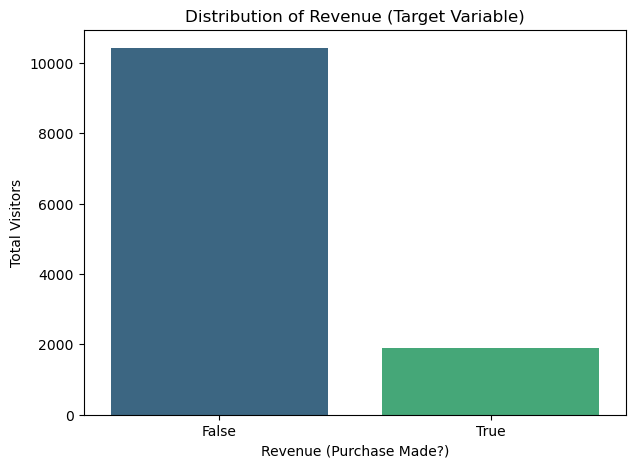

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(data=df1, x='Revenue', hue='Revenue', palette='viridis', legend=False)


plt.title('Distribution of Revenue (Target Variable)')
plt.xlabel('Revenue (Purchase Made?)')
plt.ylabel('Total Visitors')

plt.show()

In [7]:
df["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [8]:
num_feature = df1.select_dtypes(include=["int64" ,"float64"]).columns
num_feature
print("Total numerical columns is : " , num_feature.value_counts().sum())
cat_feature = df1.select_dtypes(include=["object" , "category"]).columns
cat_feature
print("Total categorical columns is : ", cat_feature.value_counts().sum())



Total numerical columns is :  14
Total categorical columns is :  2


In [9]:
# Label Encoding 

le = LabelEncoder()
df["Month"] = le.fit_transform(df["Month"])
df["Weekend"] = le.fit_transform(df["Weekend"])

print(df1[["Month" , "Weekend"]].head())


   Month  Weekend
0      2        0
1      2        0
2      2        0
3      2        0
4      2        1


In [10]:
X = df1.drop(["Revenue"] , axis = 1)
y = df1["Revenue"].astype("int64")

In [11]:

X_train ,X_test , y_train , y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from sklearn.preprocessing import StandardScaler


preprocess = ColumnTransformer(
    transformers=[
        ("num" , StandardScaler() , num_feature),
        ("cat" , OneHotEncoder() , cat_feature)
    ],
    remainder="passthrough"
)

In [13]:
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=30,
    class_weight="balanced",
    random_state = 42
)

In [14]:
# Create a pipeline
pipe = Pipeline(
    steps=[
        ("preprocessor" , preprocess),
        ("model", dt)
    ]
)

In [15]:
pipe.fit(X_train , y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
y_pred = pipe.predict(X_test)

print("f1 score: ", f1_score(y_pred , y_test))
print("\nClassification Report\n" , classification_report(y_test , y_pred))
print("\n Confusion Matrix\n",confusion_matrix(y_test , y_pred))

f1 score:  0.6278381046396841

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      2084
           1       0.50      0.83      0.63       382

    accuracy                           0.85      2466
   macro avg       0.73      0.84      0.77      2466
weighted avg       0.89      0.85      0.86      2466


 Confusion Matrix
 [[1771  313]
 [  64  318]]


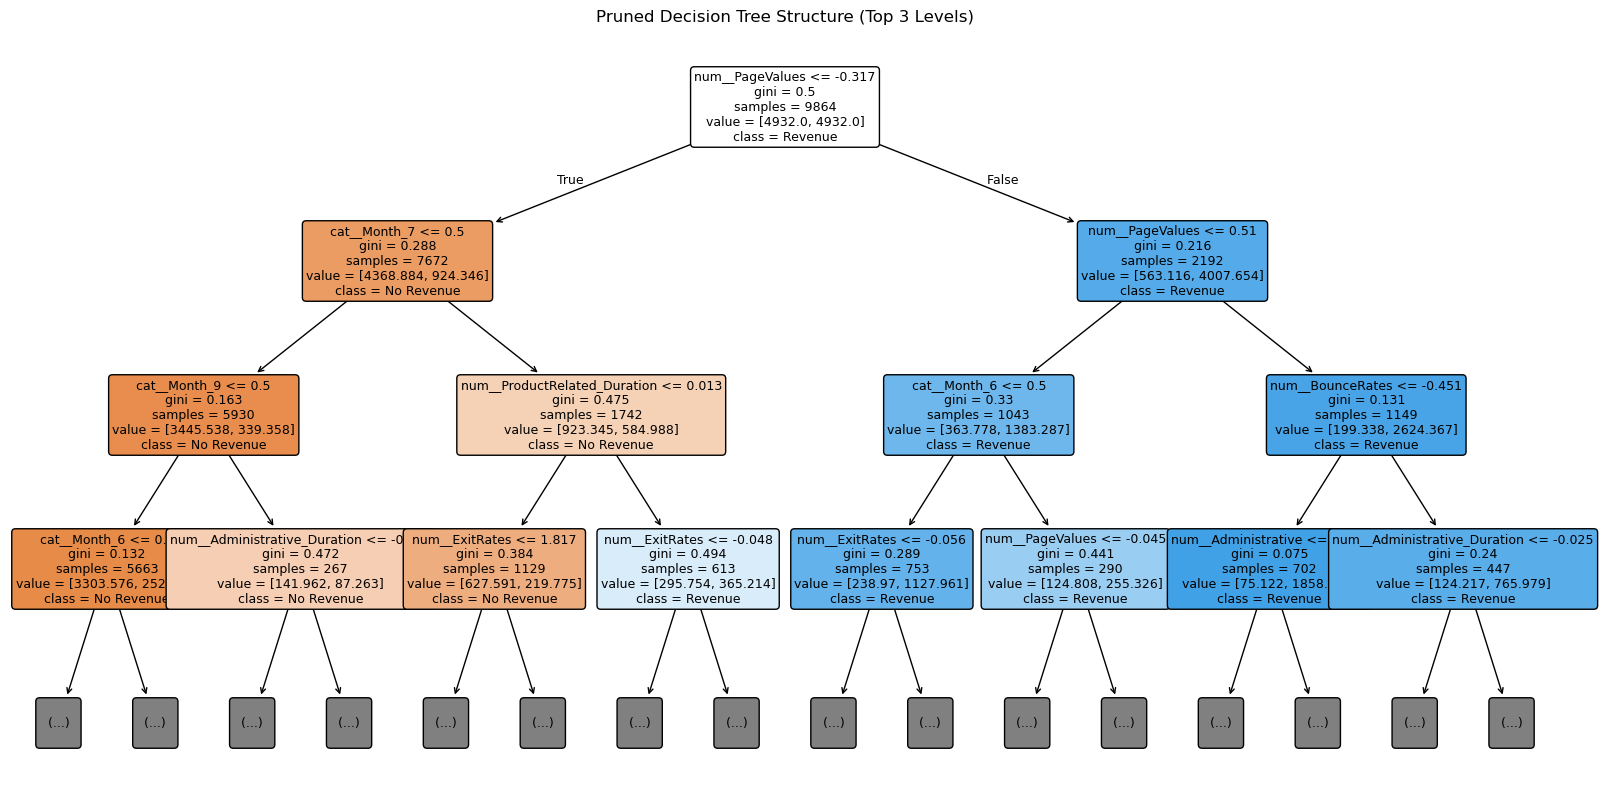

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pipeline se trained model nikalna
trained_tree = pipe.named_steps['model']

# Preprocessing ke baad ke feature names nikalna
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(20,10))
plot_tree(
    trained_tree, 
    feature_names=feature_names, 
    class_names=['No Revenue', 'Revenue'], 
    filled=True, 
    rounded=True, 
    max_depth=3, 
    fontsize=9
)
plt.title("Pruned Decision Tree Structure (Top 3 Levels)")
plt.show()

In [18]:
dt_unprune = DecisionTreeClassifier(class_weight="balanced" , random_state=42) 

#create a pipeline 
pipe_unpruned = Pipeline(steps=[
    ("preprocessor", preprocess),
    ("model", dt_unprune)
])

In [19]:
pipe_unpruned.fit(X_train , y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
train_pred_unpruned = pipe_unpruned.predict(X_train)
test_pred_unpruned = pipe_unpruned.predict(X_test)

print("--- Unpruned Model (Overfitting Check) ---")
print(f"Training F1 Score: {f1_score(y_train, train_pred_unpruned):.4f}")
print(f"Testing F1 Score: {f1_score(y_test, test_pred_unpruned):.4f}")


print("\n--- Your Pruned Model (max_depth=6) ---")
print(f"Testing F1 Score: 0.6278")

--- Unpruned Model (Overfitting Check) ---
Training F1 Score: 1.0000
Testing F1 Score: 0.5116

--- Your Pruned Model (max_depth=6) ---
Testing F1 Score: 0.6278
